In [3]:
import pickle

import matplotlib.pyplot as plt
import numpy as np
import torch

from dataset import TrainDataset, InferenceDataset, Normalizer

%load_ext autoreload
%autoreload 2

In [1]:
def plot_patch(inps, targets):
    inps = inps.squeeze()
    targets = targets.squeeze()
    fig, axes = plt.subplots(1, 7, figsize=(20, 4))  # Adjust the grid size based on the number of images
    titles = ['TAU', 'Q_HI', 'U_HI', 'Q_LR', 'U_LR', 'Q_HR', 'U_HR']

    # Loop through each image and plot it on the respective axis
    for i, ax in enumerate(axes):
        if i < 5:
            img_plot = ax.imshow(inps[i])
        else:
            img_plot = ax.imshow(targets[i - 5])
        ax.set_title(titles[i])
        plt.colorbar(img_plot, ax=ax)  # Attach colorbar to each image

    plt.tight_layout()
    plt.show()


def plot_inf_patch(inps):
    inps = inps.squeeze()
    fig, axes = plt.subplots(1, 5, figsize=(20, 4))  # Adjust the grid size based on the number of images
    titles = ['TAU', 'Q_HI', 'U_HI', 'Q_LR', 'U_LR']

    # Loop through each image and plot it on the respective axis
    for i, ax in enumerate(axes):
        img_plot = ax.imshow(inps[i])
        ax.set_title(titles[i])
        plt.colorbar(img_plot, ax=ax)  # Attach colorbar to each image

    plt.tight_layout()
    plt.show()

### Test `TrainDataset`

In [4]:
dset = TrainDataset()
print(len(dset))

2458


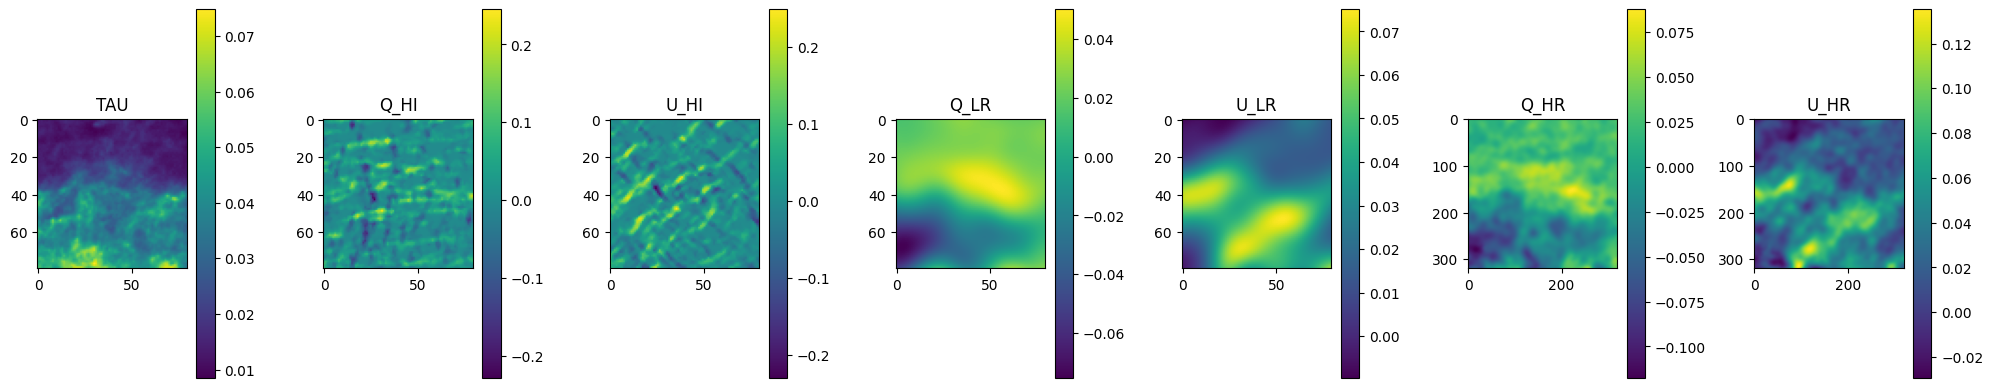

In [4]:
plot_patch(*dset[343])

In [15]:
dset = TrainDataset(add_noise=True, noise_scale_factor=0.2)
print(len(dset))

2458


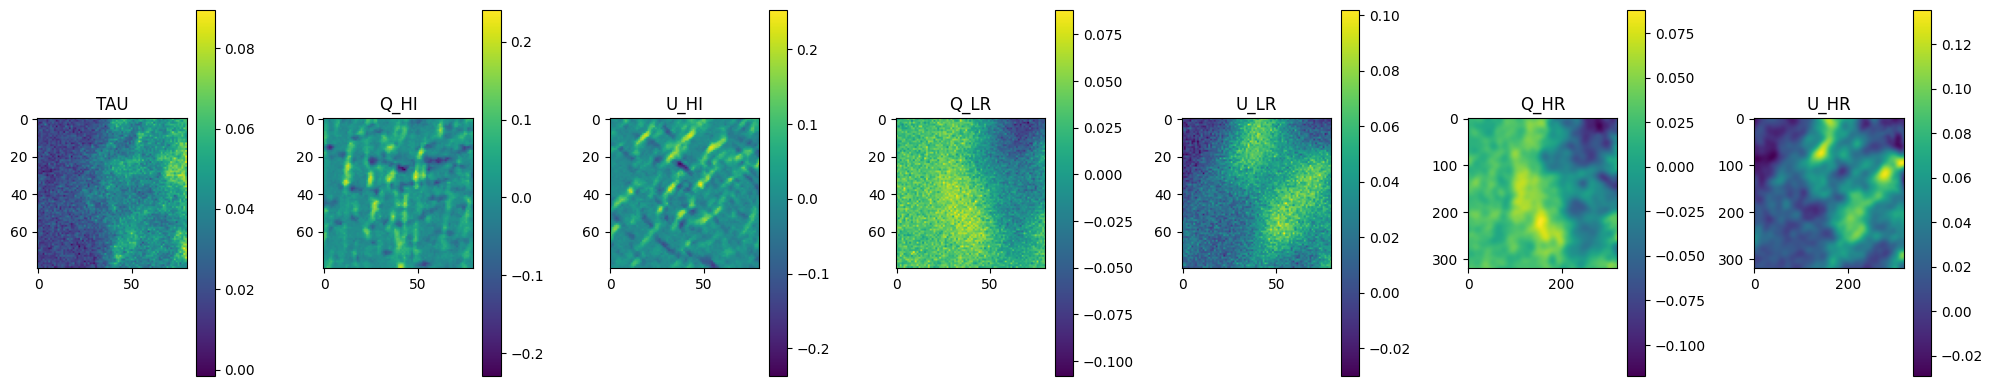

In [18]:
plot_patch(*dset[343])

### Test `InferenceDataset`

In [21]:
inf = InferenceDataset()

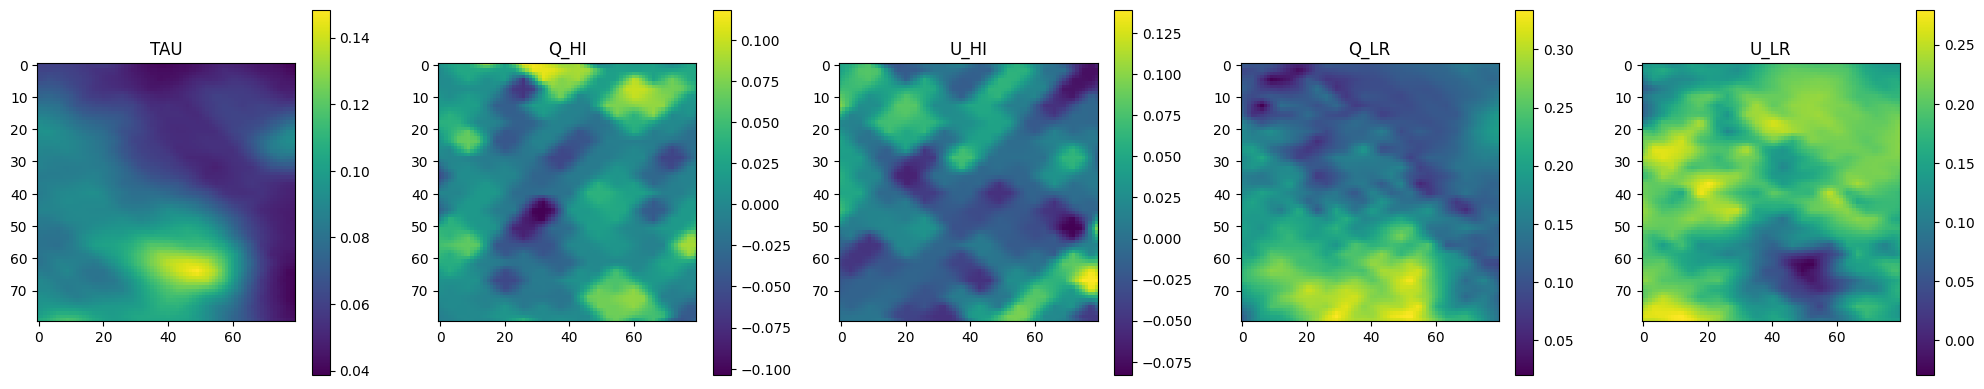

In [27]:
plot_inf_patch(inf[421])

### Test `Normalizer`

In [23]:
with open('data/inference_patches.pkl', 'rb') as f:
    patches = pickle.load(f)

In [33]:
normer = Normalizer()
for r, p in patches.items():
    print(f'Pct. Agreement for {r}\': {np.isclose(p, normer.denorm(normer.norm(torch.tensor(p)))).mean():.2%}')

Pct. Agreement for 5.0': 96.80%
Pct. Agreement for 7.0': 99.99%
Pct. Agreement for 10.0': 100.00%
Pct. Agreement for 15.0': 100.00%
Pct. Agreement for 20.0': 100.00%
Pct. Agreement for 30.0': 100.00%
Pct. Agreement for 60.0': 100.00%
Pct. Agreement for 80.0': 100.00%
